# Initialization

I basically followed https://github.com/Kulbear 's work on Andrew Ng's Deep Learning Specialization C2W1 homework assignment with some modification

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.

A well chosen initialization can:

- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error

## Importing the Libraries and Setting Up the enviornments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import sklearn.datasets

import seaborn as sns

from google.colab import drive
import sys

In [2]:
%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['figure.figsize'] = (7.0, 4.0)

In [37]:
# importing user-defined libraries


drive.mount('/content/gdrive')

sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/02 Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization/C2W1/01. Initialization/')
import init_utils

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing the dataset

In [4]:
def load_dataset():
  np.random.seed(1)
  train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
  np.random.seed(2)
  test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=0.05)

  plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
  plt.show()
  #sns.scatterplot(train_X[:, 0], train_X[:, 1], hue=train_Y, size=40, palette='Spectral')
  #plt.show()
  #print(train_X.shape, train_Y.shape)
  #reshape X = (nx, m), reshape Y=(1, m)
  train_X = train_X.T
  train_Y = train_Y.reshape((1, -1))
  test_X = test_X.T
  test_Y = test_Y.reshape((1, -1))
  return train_X, train_Y, test_X, test_Y

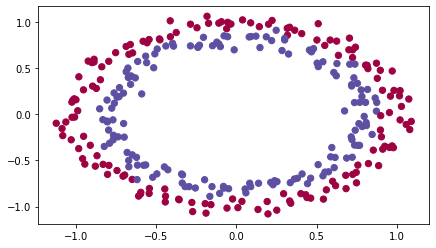

In [5]:
train_X, train_Y, test_X, test_Y = load_dataset()

In [6]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((2, 300), (1, 300), (2, 100), (1, 100))

## 2 Neural Network Model

General Mothology to implement NN:
1. define NN architecure
2. Initialize parameters
3. Loop
- calculate predictions (forward propagation)
- calculate costs /loss
- calculate gradients (backward propagation)
- update parameters (gradient descent)

In [7]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization='he'):
  '''
  Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

  Arguments:
  X -- input data, of shape (2, number of examples)
  Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
  learning_rate -- learning rate for gradient descent 
  num_iterations -- number of iterations to run gradient descent
  print_cost -- if True, print the cost every 1000 iterations
  initialization -- flag to choose which initialization to use ("zeros","random" or "he")

  Returns:
  parameters -- parameters learnt by the model
  '''
  grads = {}
  costs = []

  m = X.shape[1]
  layer_dims = [X.shape[0], 10, 5, 1]

  if initialization == 'zeros':
    parameters = initialize_parameters_zeros(layer_dims)
  elif initialization == 'random':
    parameters = initialize_parameters_random(layer_dims)
  else:
    parameters = initialize_parameters_he(layer_dims)

  for i in range(0, num_iterations, 1):
    al, cache = init_utils.forward_propagation(X, parameters)
    cost = init_utils.compute_loss(al, Y)
    grads = init_utils.backward_propagation(X, Y, cache)
    parameters = init_utils.update_parameters(parameters, grads, learning_rate)

    if print_cost and i % 1000 == 0:
      costs.append(cost)
      print("Cost after iteration {}: {}".format(i, cost))
    
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per thousands)')
  plt.title('learning rate =' + str(learning_rate))
  plt.show()

  return parameters

In [8]:
def predict(X, Y, parameters):
  """
  This function is used to predict the results of a  n-layer neural network.
  
  Arguments:
  X -- data set of examples you would like to label
  Y -- label
  parameters -- parameters of the trained model
  
  Returns:
  p -- predictions for the given dataset X
  """  
  m = X.shape[1]
  p = np.zeros((1, m), dtype=int)

  a3, cache = init_utils.forward_propagation(X, parameters)
  p[a3 > 0.5] = 1
  print("Accuracy: "  + str(np.mean((p[0,:] == Y[0,:]))))

  return p

In [9]:
def predict_dec(parameters, X):
  """
  Used for plotting decision boundary.

  Arguments:
  parameters -- python dictionary containing your parameters 
  X -- input data of size (m, K)

  Returns
  predictions -- vector of predictions of our model (red: 0 / blue: 1)
  """
    
  # Predict using forward propagation and a classification threshold of 0.5
  a3, cache = init_utils.forward_propagation(X, parameters)
  predictions = (a3 > 0.5)
  return predictions

In [10]:
def plot_decision_boundary(model, X, Y):
  x_min, x_max = X[0, :].min() -1, X[0, :].max() +1
  y_min, y_max = X[1, :].min() -1, X[1, :].max() +1
  step = 0.01
  
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  Z = model(np.c_[np.ravel(xx), np.ravel(yy)])
  Z = Z.reshape(xx.shape)
  print(Z.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral )
  plt.xlabel('x1')
  plt.xlabel('x2')
  plt.scatter(X[0, :], X[1, :], s=40, c=Y, cmap=plt.cm.Spectral)

### 2.1 Zeros Initialization

In [19]:
def initialize_parameters_zeros(layers_dims):
  """
  Arguments:
  layer_dims -- python array (list) containing the size of each layer.

  Returns:
  parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                  W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                  b1 -- bias vector of shape (layers_dims[1], 1)
                  ...
                  WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                  bL -- bias vector of shape (layers_dims[L], 1)
  """  
  L = len(layers_dims) -1 #input layer are not counted
  parameters = {}
  for l in range(1, L+1, 1):
    parameters['W'+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
    parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
  return parameters

In [12]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

L: 2
W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


L: 3
Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


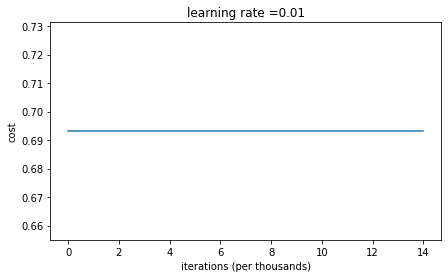

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [13]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [14]:
print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


(415, 422)


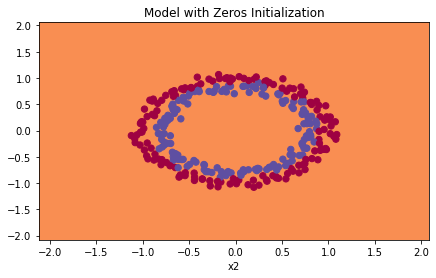

In [16]:
plt.title('Model with Zeros Initialization')
#predict_dec(parameters, train_X)
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 2.2 Random Initialization

In [21]:
def initialize_parameters_random(layers_dims):
  np.random.seed(3)

  L = len(layers_dims) -1 #input layer are not counted
  parameters = {}
  for l in range(1, L+1, 1):
    parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
    parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
  return parameters

In [22]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/02 Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization/C2W1/01. Initialization/init_utils.py:146: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/02 Improving Deep Neural Networks Hyperparameter tuning, Regularization and Optimization/C2W1/01. Initialization/init_utils.py:146: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6247924745506072
Cost after iteration 2000: 0.5980258056061102
Cost after iteration 3000: 0.5637539062842213
Cost after iteration 4000: 0.5501256393526495
Cost after iteration 5000: 0.5443826306793814
Cost after iteration 6000: 0.5373895855049121
Cost after iteration 7000: 0.47157999220550006
Cost after iteration 8000: 0.39770475516243037
Cost after iteration 9000: 0.3934560146692851
Cost after iteration 10000: 0.3920227137490125
Cost after iteration 11000: 0.38913700035966736
Cost after iteration 12000: 0.3861358766546214
Cost after iteration 13000: 0.38497629552893475
Cost after iteration 14000: 0.38276694641706693


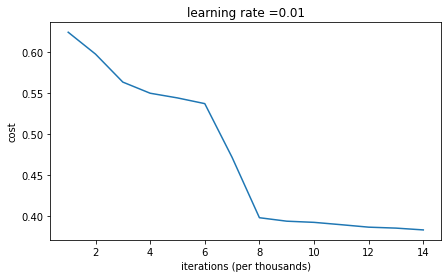

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [23]:
parameters = model(train_X, train_Y, initialization = "random")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [24]:
print(predictions_train)
print(predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


(415, 422)


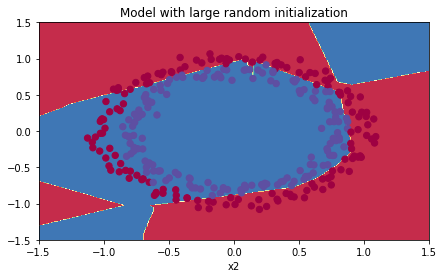

In [25]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 2.3 He Initialization

In [33]:
def initialize_parameters_he(layers_dims):
  np.random.seed(3)

  L = len(layers_dims) -1 #input layer are not counted
  parameters = {}
  for l in range(1, L+1, 1):
    parameters['W'+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
    parameters['b'+str(l)] = np.zeros((layers_dims[l], 1))
  return parameters  

In [34]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893805
Cost after iteration 4000: 0.6082958970572938
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071794
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322562
Cost after iteration 9000: 0.1859728720920684
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677366


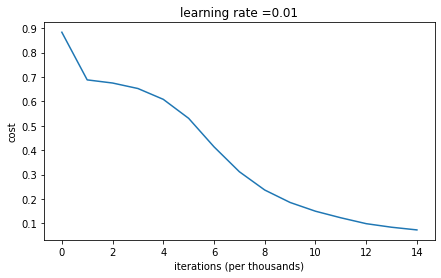

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [35]:
parameters = model(train_X, train_Y, initialization = "he")
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

(415, 422)


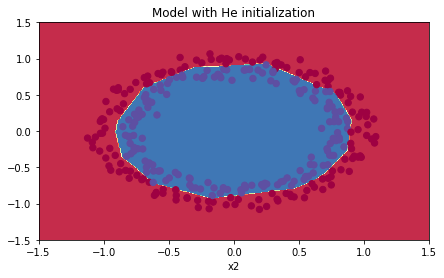

In [36]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)